# Project 2: House Prices

## Problem Statment:

House prices are often influenced by several qualities or elements. In this project we will try to find the most important elements that affect the rise or fall of house prices significantly

## Executive Summary:

We started this competition by focusing on getting a well understanding of the dataset. The EDA is detailed and many visualizations are included. Then we provide four kind of modeling in order to reach to best predections.

Redge regressions performs best with a cross validation score of 0.14. 

## Datasets Description:

- [House prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)



This is a brief version of what you'll find in the data description file.

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

 

|Feature | Dataset | Description |
|---|---|---|
|SalePrice |train|the property's sale price in dollars. This is the target variable that you're trying to predict.|
|MSSubClass|train/test| The building class|
|MSZoning|train/test|The general zoning classification|
|LotFrontage|train/test| Linear feet of street connected to property|
|LotArea|train/test|Lot size in square feet|
|Street|train/test| Type of road access|
|Alley|train/test| Type of alley access|
|LotShape|train/test| General shape of property|
|LandContour|train/test| Flatness of the property|
|Utilities|train/test| Type of utilities available|
|LotConfig|train/test|Lot configuration|
|LandSlope|train/test| Slope of property|
|Neighborhood|train/test| Physical locations within Ames city limits|
|Condition1|train/test| Proximity to main road or railroad|
|Condition2|train/test| Proximity to main road or railroad (if a second is present)|
|BldgType|train/test|Type of dwelling|
|HouseStyle|train/test| Style of dwelling|
|OverallQual|train/test| Overall material and finish quality|
|OverallCond|train/test|Overall condition rating|
|YearBuilt|train/test|Original construction date|
|YearRemodAdd|train/test|Remodel date|
|RoofStyle|train/test| Type of roof|
|RoofMatl|train/test| Roof material|
|Exterior1st|train/test| Exterior covering on house|
|Exterior2nd|train/test| Exterior covering on house (if more than one material)|
|MasVnrType|train/test| Masonry veneer type|
|MasVnrArea|train/test| Masonry veneer area in square feet|
|ExterQual|train/test| Exterior material quality|
|ExterCond|train/test| Present condition of the material on the exterior|
|Foundation|train/test|Type of foundation|
|BsmtQual|train/test| Height of the basement|
|BsmtCond|train/test|General condition of the basement|
|BsmtExposure|train/test|Walkout or garden level basement walls|
|BsmtFinType1|train/test| Quality of basement finished area|
|BsmtFinSF1|train/test| Type 1 finished square feet|
|BsmtFinType2|train/test| Quality of second finished area (if present)|
|BsmtFinSF2|train/test| Type 2 finished square feet|
|BsmtUnfSF|train/test|Unfinished square feet of basement area|
|TotalBsmtSF|train/test| Total square feet of basement area|
|Heating|train/test| Type of heating|
|HeatingQC|train/test| Heating quality and condition|
|CentralAir|train/test| Central air conditioning|
|Electrical|train/test| Electrical system|
|1stFlrSF|train/test| First Floor square feet|
|2ndFlrSF|train/test| Second floor square feet|
|LowQualFinSF|train/test| Low quality finished square feet (all floors)|
|GrLivArea|train/test| Above grade (ground) living area square feet|
|BsmtFullBath|train/test| Basement full bathrooms|
|BsmtHalfBath|train/test| Basement half bathrooms|
|FullBath|train/test| Full bathrooms above grade|
|HalfBath|train/test| Half baths above grade|
|Bedroom|train/test| Number of bedrooms above basement level|
|Kitchen|train/test| Number of kitchens|
|KitchenQual|train/test| Kitchen quality|
|TotRmsAbvGrd|train/test| Total rooms above grade (does not include bathrooms)|
|Functional|train/test| Home functionality rating|
|Fireplaces|train/test| Number of fireplaces|
|FireplaceQu|train/test| Fireplace quality|
|GarageType|train/test| Garage location|
|GarageYrBlt|train/test| Year garage was built|
|GarageFinish|train/test| Interior finish of the garage|
|GarageCars|train/test| Size of garage in car capacity|
|GarageArea|train/test| Size of garage in square feet|
|GarageQual|train/test| Garage quality|
|GarageCond|train/test| Garage condition|
|PavedDrive|train/test| Paved driveway|
|WoodDeckSF|train/test| Wood deck area in square feet|
|OpenPorchSF|train/test| Open porch area in square feet|
|EnclosedPorch|train/test| Enclosed porch area in square feet|
|3SsnPorch|train/test| Three season porch area in square feet|
|ScreenPorch|train/test| Screen porch area in square feet|
|PoolArea|train/test|Pool area in square feet|
|PoolQC|train/test|Pool quality|
|Fence|train/test| Fence quality|
|MiscFeature|train/test| Miscellaneous feature not covered in other categories|
|MiscVal|train/test| $Value of miscellaneous feature|
|MoSold|train/test| Month Sold|
|YrSold|train/test| Year Sold|
|SaleType|train/test| Type of sale|
|SaleCondition|train/test| Condition of sale|



## Data Import and Cleaning:

In this step we explore the Data and try to fix  any feature contain null values and check the feature Data type 

In [2]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
# read the two data-sets.

test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train.head()
#test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [682]:
# EDA the data by exploring the shape .
print('the shape of train',train.shape)
print('the shape of test',test.shape)

the shape of train (1460, 81)
the shape of test (1459, 80)


In [683]:
# explore the data type.
train.dtypes
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [4]:
# describe the data .
train.describe()
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [685]:
# finding the null values of train .
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
# fill the null values .
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train['Alley']=train.Alley.replace(np.nan,'NA')
train['MasVnrType']=train.MasVnrType.replace(np.nan,'CBlock')
train.MasVnrArea.fillna(train.MasVnrArea.mean(), inplace=True)
train['FireplaceQu']=train.FireplaceQu.replace(np.nan,'NA')
train['GarageType']=train.GarageType.replace(np.nan,'NA')
train.GarageYrBlt.fillna(train.GarageYrBlt.mean(), inplace=True)
train['GarageFinish']=train.GarageFinish.replace(np.nan,'NA')
train['GarageQual']=train.GarageQual.replace(np.nan,'NA')
train['GarageCond']=train.GarageCond.replace(np.nan,'NA')
train['PoolQC']=train.PoolQC.replace(np.nan,'NA')
train['Fence']=train.Fence.replace(np.nan,'NA')
train['MiscFeature']=train.MiscFeature.replace(np.nan,'NA')

In [6]:
# check  the rest columns for null values .
print(round((train.isnull().sum()*100/len(train)),1).sort_values(ascending=False).head(7))


BsmtFinType2    2.6
BsmtExposure    2.6
BsmtQual        2.5
BsmtFinType1    2.5
BsmtCond        2.5
Electrical      0.1
ExterQual       0.0
dtype: float64


In [7]:
# fill the null values .
train['BsmtFinType2']=train.BsmtFinType2.replace(np.nan,'NA')
train['BsmtExposure']=train.BsmtExposure.replace(np.nan,'NA')
train['BsmtQual']=train.BsmtQual.replace(np.nan,'NA')
train['BsmtFinType1']=train.BsmtFinType1.replace(np.nan,'NA')
train['BsmtCond']=train.BsmtCond.replace(np.nan,'NA')
train['Electrical']=train.Electrical.replace(np.nan,'NA')

In [8]:
## finding the null values of test .
print(round((test.isnull().sum()*100/len(test)),1).sort_values(ascending=False).head(35))


PoolQC          99.8
MiscFeature     96.5
Alley           92.7
Fence           80.1
FireplaceQu     50.0
LotFrontage     15.6
GarageQual       5.3
GarageYrBlt      5.3
GarageFinish     5.3
GarageCond       5.3
GarageType       5.2
BsmtCond         3.1
BsmtQual         3.0
BsmtExposure     3.0
BsmtFinType2     2.9
BsmtFinType1     2.9
MasVnrType       1.1
MasVnrArea       1.0
MSZoning         0.3
BsmtFinSF2       0.1
BsmtUnfSF        0.1
BsmtHalfBath     0.1
BsmtFinSF1       0.1
Exterior2nd      0.1
TotalBsmtSF      0.1
SaleType         0.1
Exterior1st      0.1
BsmtFullBath     0.1
KitchenQual      0.1
Functional       0.1
Utilities        0.1
GarageArea       0.1
GarageCars       0.1
LandSlope        0.0
MSSubClass       0.0
dtype: float64


In [9]:
# fill the null values .
test['PoolQC']=test.PoolQC.replace(np.nan,'NA')
test['MiscFeature']=test.MiscFeature.replace(np.nan,'NA')
test['Alley']=test.Alley.replace(np.nan,'NA')
test['Fence']=test.Fence.replace(np.nan,'NA')
test['FireplaceQu']=test.FireplaceQu.replace(np.nan,'NA')
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)
test['GarageQual']=test.GarageQual.replace(np.nan,'NA')
test.GarageYrBlt.fillna(test.GarageYrBlt.mean(), inplace=True)
test['GarageFinish']=test.GarageFinish.replace(np.nan,'NA')
test['GarageCond']=test.GarageCond.replace(np.nan,'NA')
test['GarageType']=test.GarageType.replace(np.nan,'NA')


In [10]:
# fill the null values .
test['BsmtFinType2']=test.BsmtFinType2.replace(np.nan,'NA')
test['BsmtExposure']=test.BsmtExposure.replace(np.nan,'NA')
test['BsmtQual']=test.BsmtQual.replace(np.nan,'NA')
test['BsmtFinType1']=test.BsmtFinType1.replace(np.nan,'NA')
test['BsmtCond']=test.BsmtCond.replace(np.nan,'NA')

In [11]:
print(round((test.isnull().sum()*100/len(test)),1).sort_values(ascending=False).head(18))


MasVnrType      1.1
MasVnrArea      1.0
MSZoning        0.3
Functional      0.1
Utilities       0.1
BsmtHalfBath    0.1
BsmtFullBath    0.1
KitchenQual     0.1
Exterior2nd     0.1
Exterior1st     0.1
GarageCars      0.1
BsmtFinSF1      0.1
SaleType        0.1
TotalBsmtSF     0.1
BsmtUnfSF       0.1
BsmtFinSF2      0.1
GarageArea      0.1
RoofMatl        0.0
dtype: float64


In [12]:
test['MasVnrType']=test.MasVnrType.replace(np.nan,'NA')
test['MasVnrType']=test.MasVnrType.replace('None','NA')
test.MasVnrArea.fillna(test.MasVnrArea.mean(), inplace=True)
test['MSZoning']=test.MSZoning.replace(np.nan,'RL')
test['Functional']=test.Functional.replace(np.nan,'Typ')
test['Utilities']=test.Utilities.replace(np.nan,'AllPub')
test['BsmtHalfBath']=test.BsmtHalfBath.replace(np.nan,0.0)
test['BsmtFullBath']=test.BsmtFullBath.replace(np.nan,0.0)
test['KitchenQual']=test.KitchenQual.replace(np.nan,'TA')
test['Exterior2nd']=test.Exterior2nd.replace(np.nan,'VinylSd')
test['Exterior1st']=test.Exterior1st.replace(np.nan,'VinylSd')
test['GarageCars']=test.GarageCars.replace(np.nan,2.0)
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean(), inplace=True)
test['SaleType']=test.SaleType.replace(np.nan,'WD')
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean(), inplace=True)
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean(), inplace=True)
test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean(), inplace=True)
test.GarageArea.fillna(test.GarageArea.mean(), inplace=True)

In [14]:
print(round((test.isnull().sum()*100/len(test)),1).sort_values(ascending=False).head(5))

SaleCondition    0.0
SaleType         0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
dtype: float64


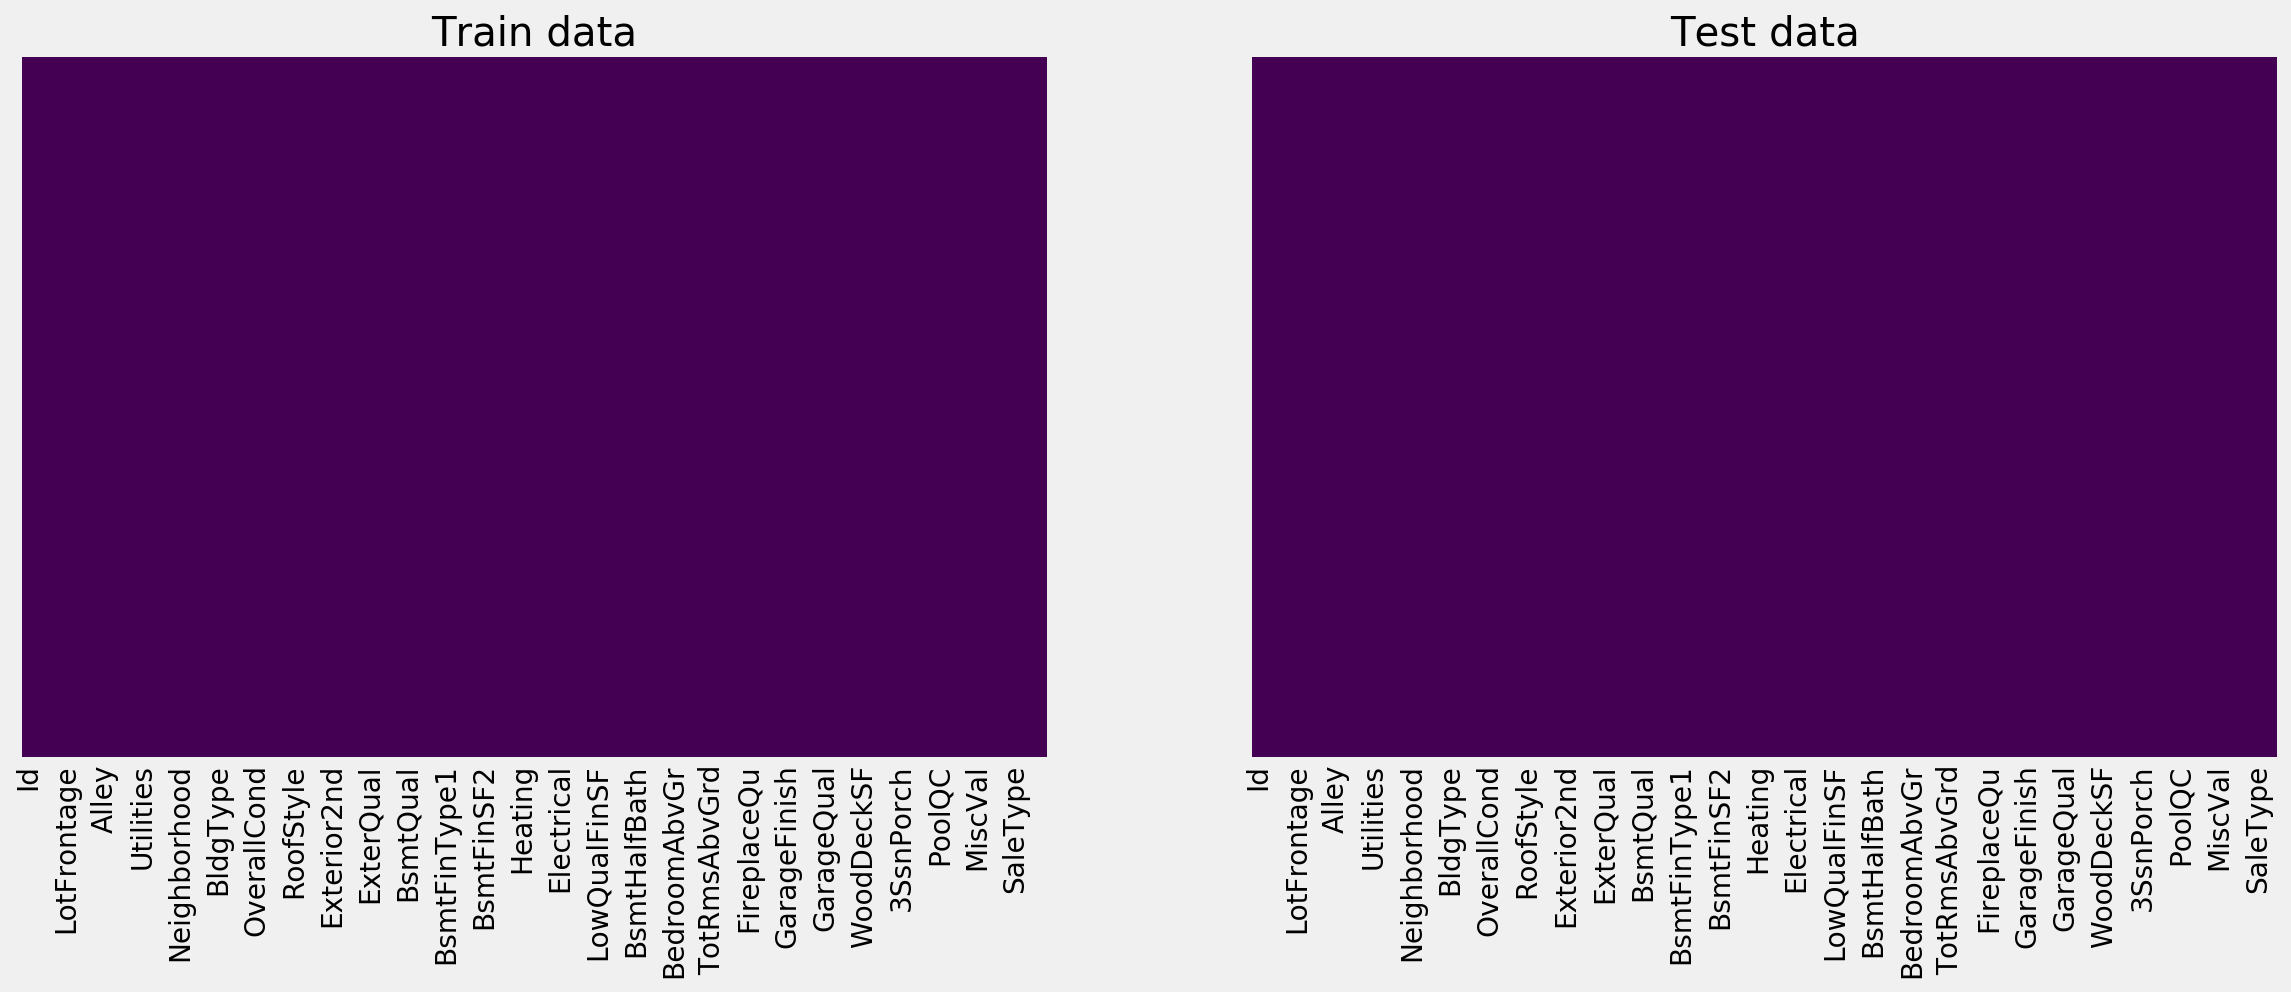

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [17]:
train_d = pd.get_dummies(train)
test_d = pd.get_dummies(test)

In [18]:
x = len(train)
both = pd.concat([train_d.drop('SalePrice',axis=1),test_d],sort=False,ignore_index=True)

In [19]:
both.fillna(0,inplace=True)
both.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrType_NA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,0,0,0,0,1,0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,0,0,0,0,1,0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,0,0,0,0,1,0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,1,0,0,0,0,0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,0,0,0,0,1,0,0.0


In [20]:
print(round((both.isnull().sum()*100/len(both)),1).sort_values(ascending=False).head(18))

MasVnrType_NA           0.0
Condition2_RRAe         0.0
Condition1_RRNe         0.0
Condition1_RRNn         0.0
Condition2_Artery       0.0
Condition2_Feedr        0.0
Condition2_Norm         0.0
Condition2_PosA         0.0
Condition2_PosN         0.0
Condition2_RRAn         0.0
Neighborhood_Mitchel    0.0
Condition2_RRNn         0.0
BldgType_1Fam           0.0
BldgType_2fmCon         0.0
BldgType_Duplex         0.0
BldgType_Twnhs          0.0
BldgType_TwnhsE         0.0
HouseStyle_1.5Fin       0.0
dtype: float64


# Visualize the Data:

<b>we visualize the data to  understand a given dataset so we used seaborn and matplotlib.</b>

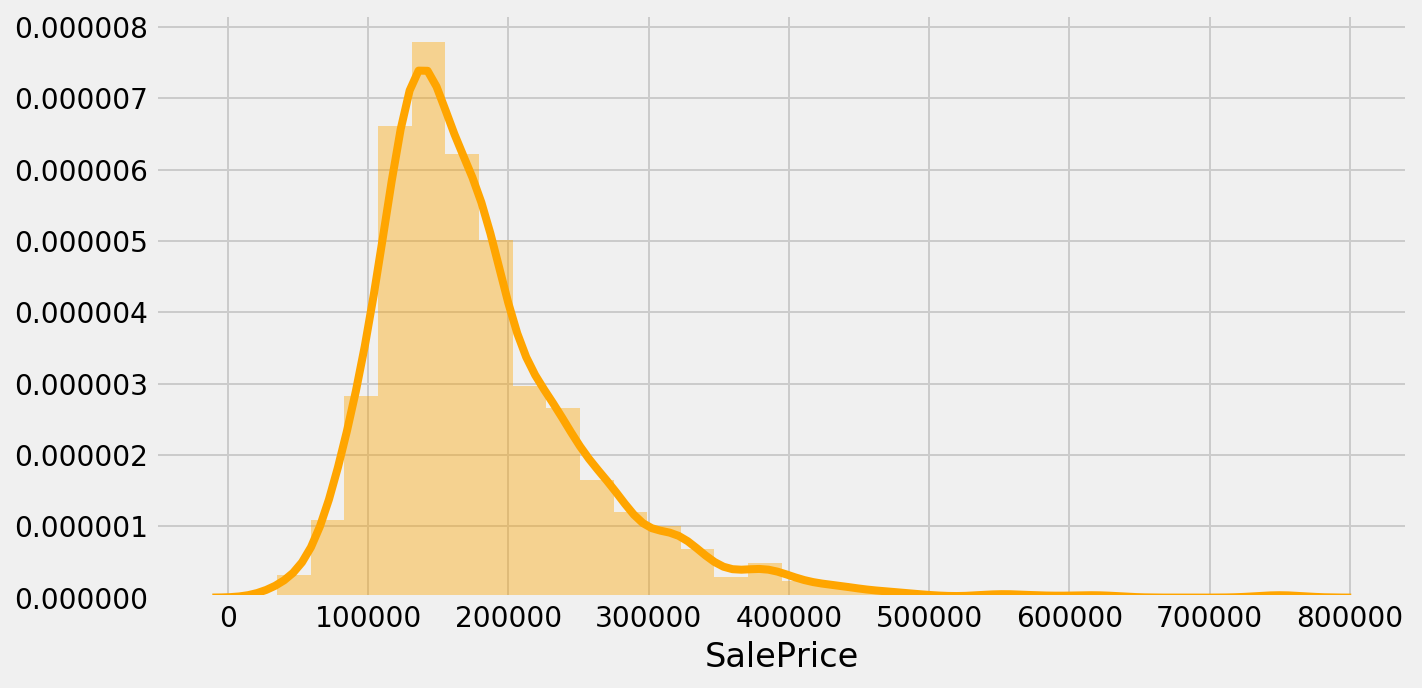

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

sns.distplot(train_d.SalePrice, bins=30, kde=True , color='orange' )

In [23]:
corr=train.corr(method='kendall')
corr1=corr.nlargest(15,'SalePrice').index
corr1


Index(['SalePrice', 'OverallQual', 'GarageCars', 'GrLivArea', 'FullBath',
       'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'YearRemodAdd', 'Fireplaces',
       '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'OpenPorchSF', 'MasVnrArea'],
      dtype='object')

In [24]:
corr2=train[['SalePrice', 'OverallQual', 'GarageCars', 'GrLivArea', 'FullBath',
       'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'YearRemodAdd', 'Fireplaces',
       '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'OpenPorchSF', 'MasVnrArea']]
corr=corr2.corr()

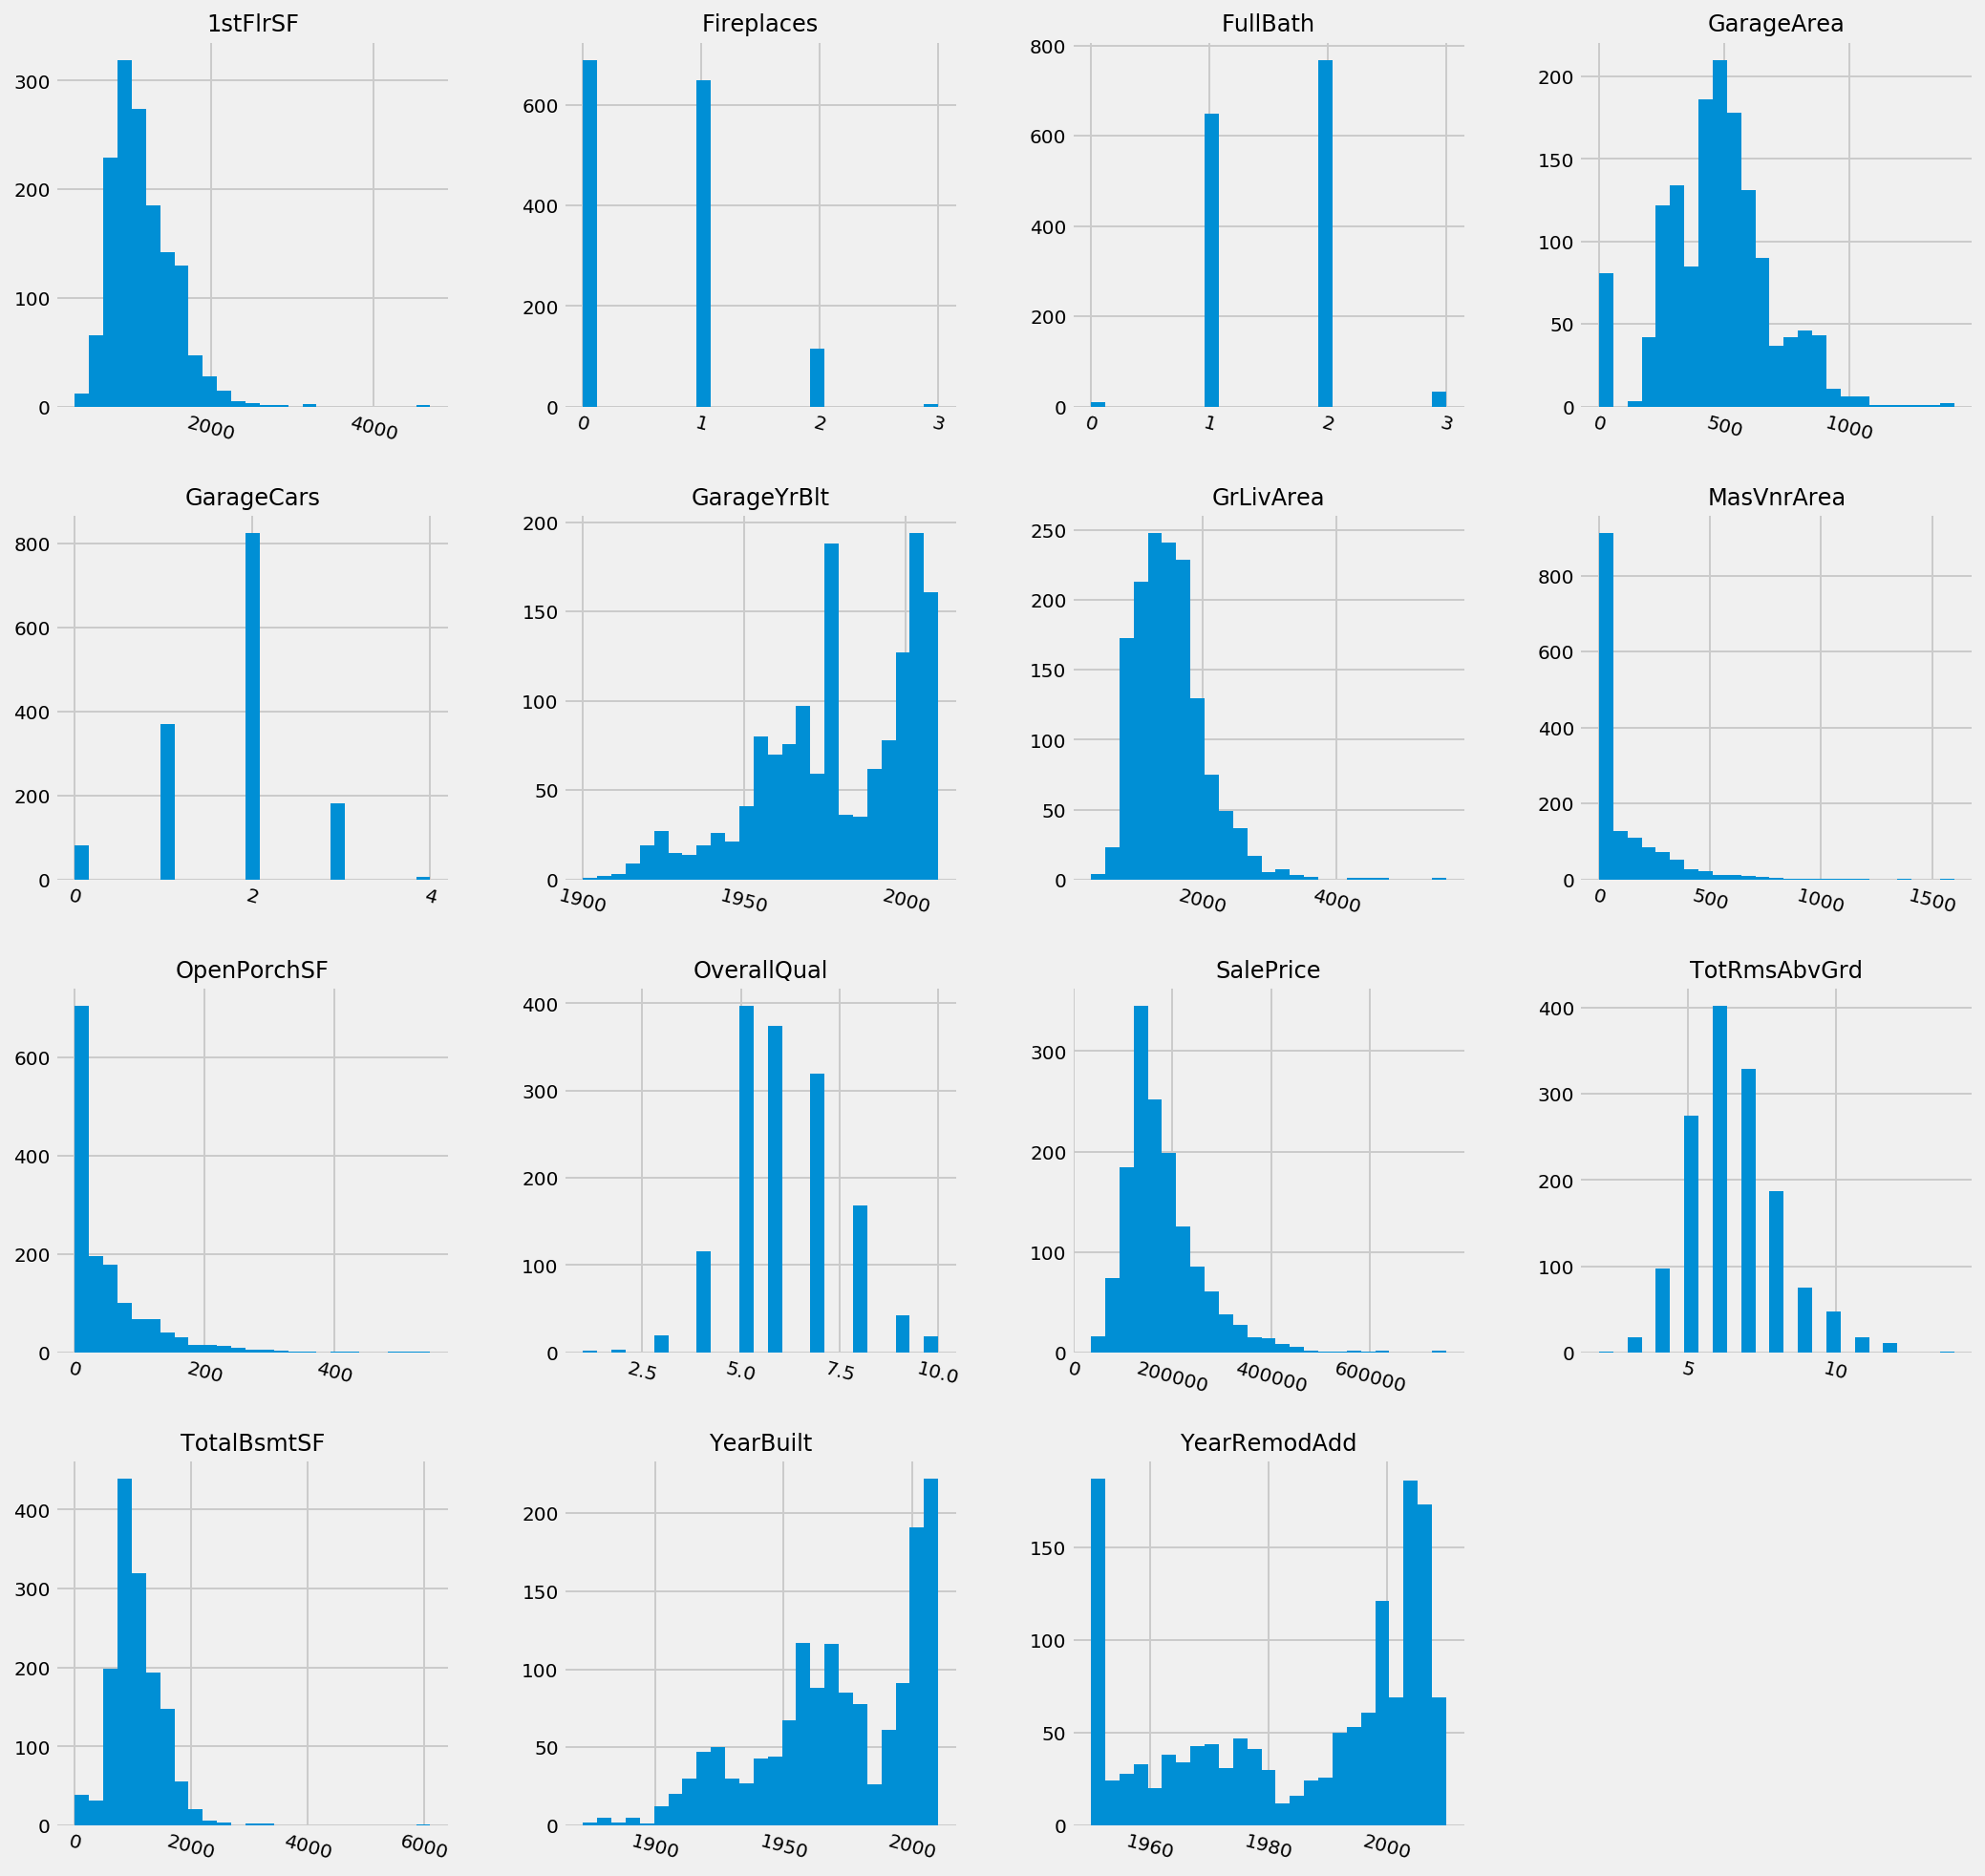

In [25]:
df1=train[['SalePrice', 'OverallQual', 'GarageCars', 'GrLivArea', 'FullBath',
       'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'YearRemodAdd', 'Fireplaces',
       '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'OpenPorchSF', 'MasVnrArea']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

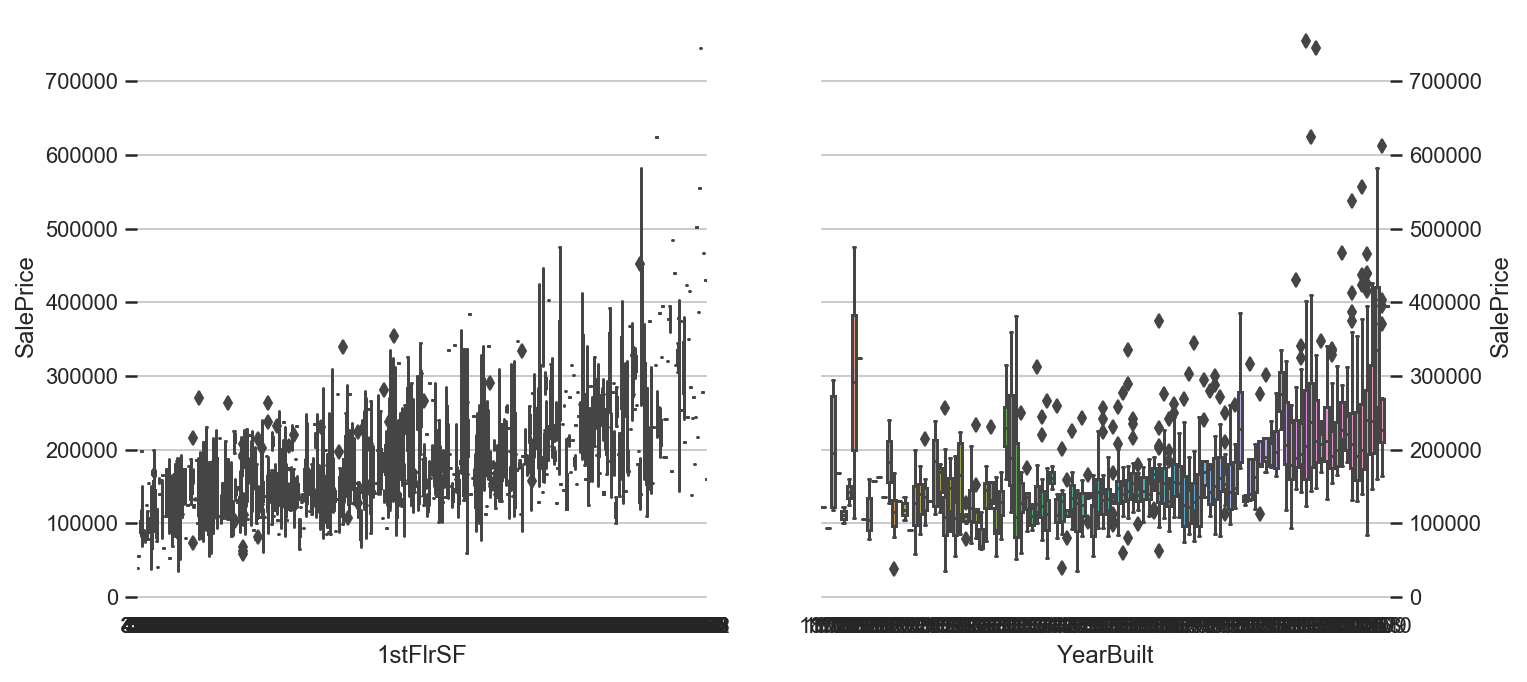

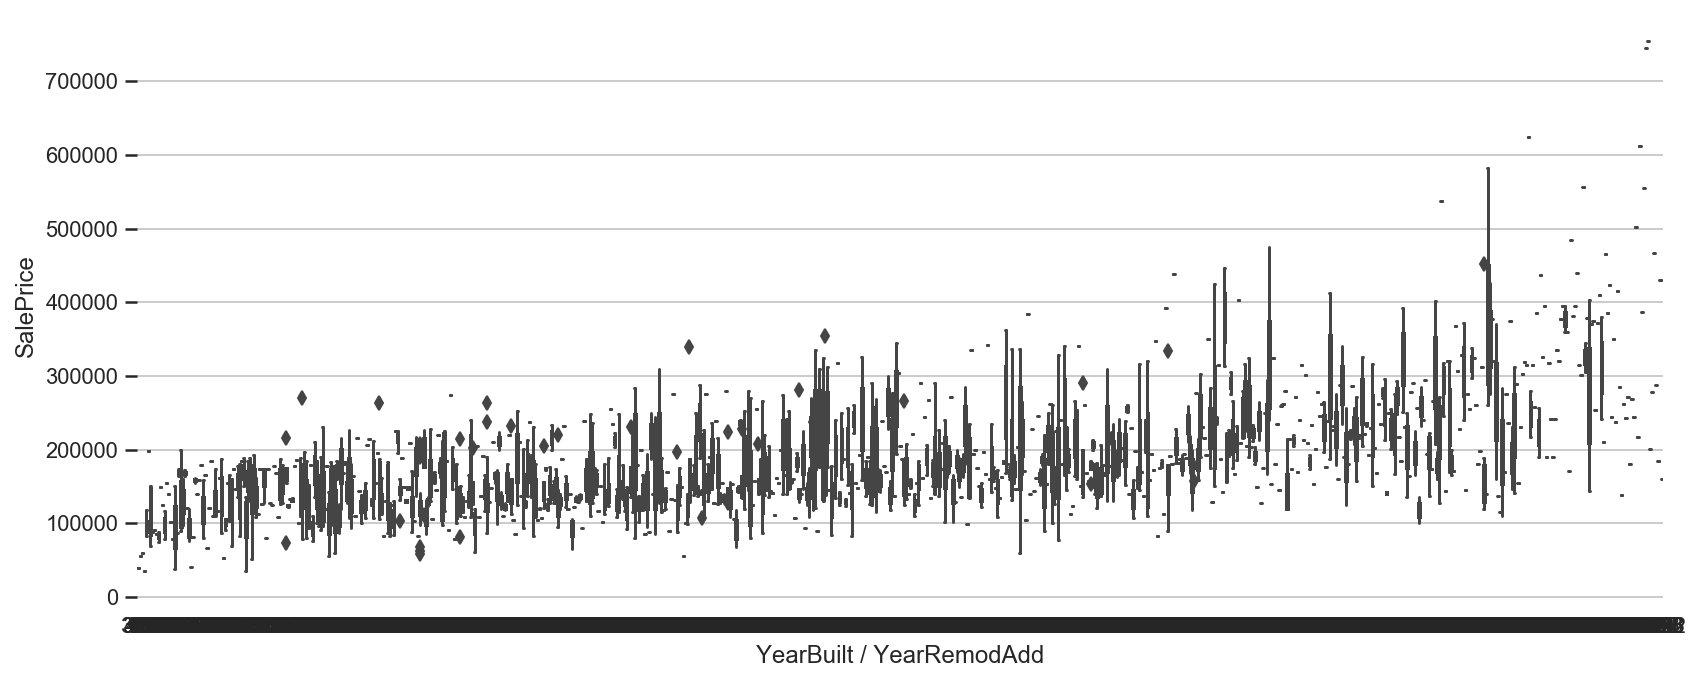

In [27]:
f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x=train['1stFlrSF'],y=train['SalePrice'], ax=axes[0])
sns.boxplot(x=train['YearBuilt'],y=train['SalePrice'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='1stFlrSF', ylabel='SalePrice')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='YearBuilt', ylabel='SalePrice')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=train['1stFlrSF'],y=train['SalePrice'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='YearBuilt / YearRemodAdd', ylabel='SalePrice');

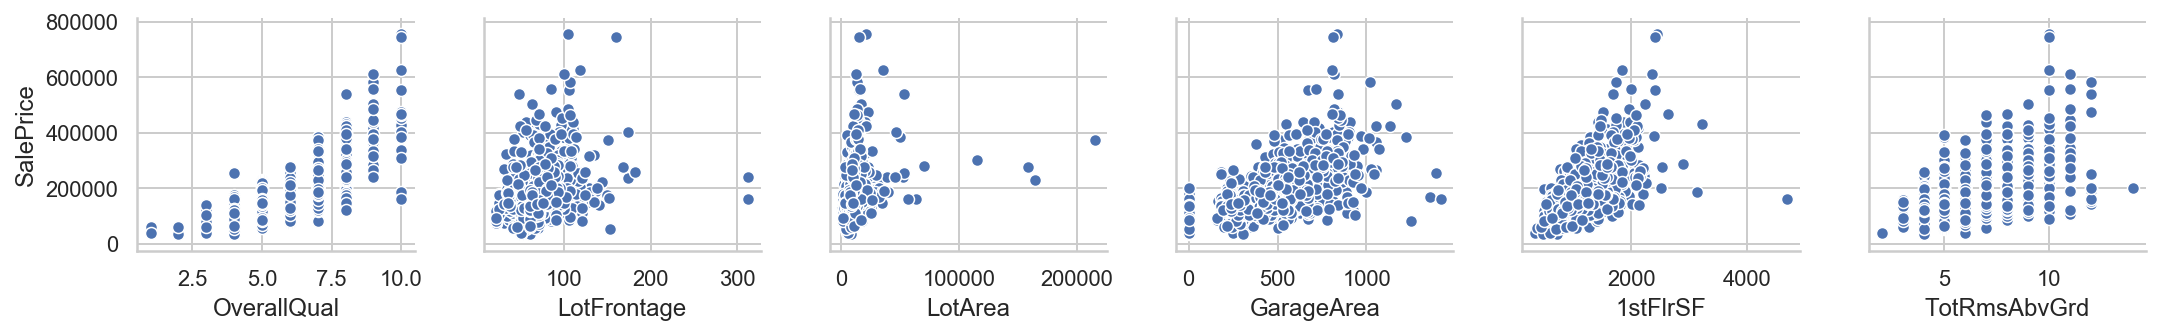

In [29]:
sns.pairplot(train_d,x_vars=[ 'OverallQual', 'LotFrontage', 'LotArea','GarageArea', '1stFlrSF', 'TotRmsAbvGrd'
       ],y_vars='SalePrice')

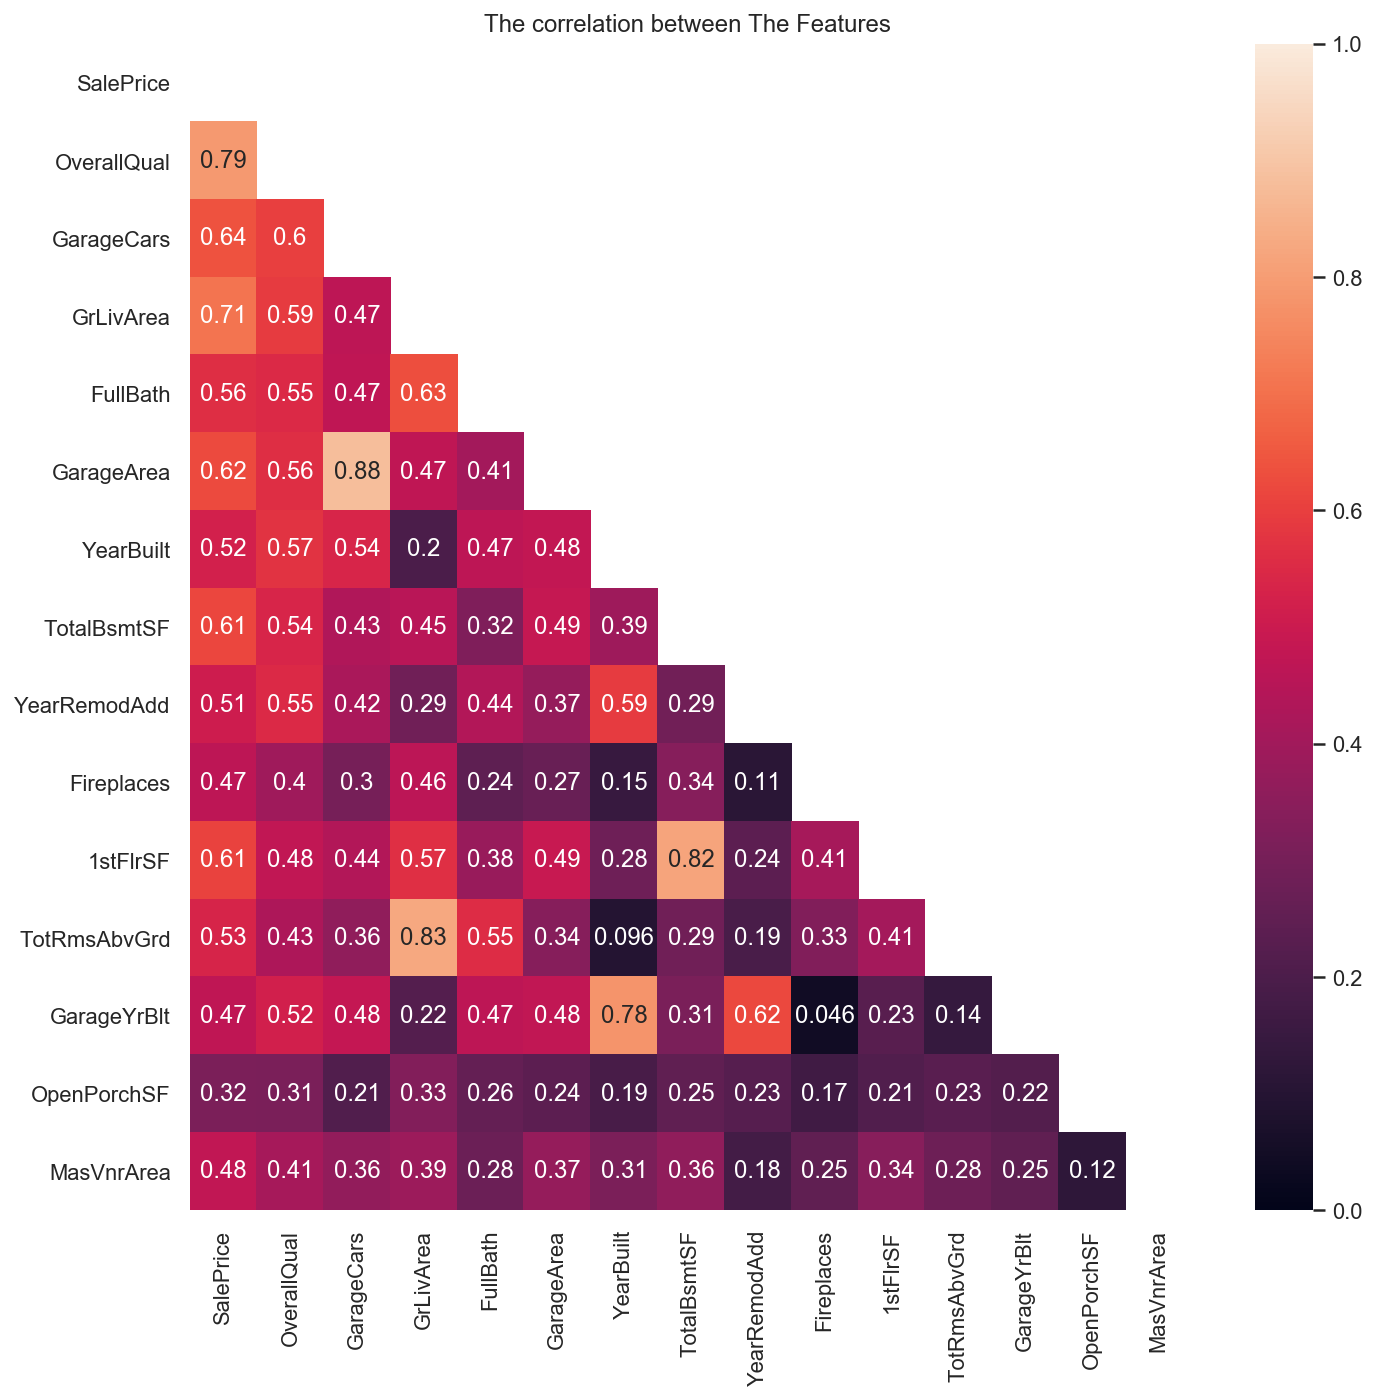

In [36]:
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
sns.heatmap(corr, annot=True,ax=ax,mask=mask,linecolor='w',vmin = 0, vmax = +1)
ax.set_title('The correlation between The Features ')
plt.show()

In [37]:
X_train=both[:x]
y_train=train['SalePrice']

In [38]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrType_NA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,0,0,0,0,1,0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,0,0,0,0,1,0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,0,0,0,0,1,0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,1,0,0,0,0,0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,0,0,0,0,1,0,0.0


In [39]:
X_test=both[x:]

In [40]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Modeling the Data :

In this step we used four model(linear regration ,lasso,Ridge,AdaBoostClassifier) to reach to the best predicts .










In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# first model is LinearRegression
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))

Cross-validated training scores: [-2.26060201e+21 -2.51723015e+21 -1.22181554e+24 -3.97360383e+24
 -4.96963309e+23]
Mean cross-validated training score: -1.1394321026991853e+24
Training Score: 0.9332979440079375


In [43]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.head()

,coefficients,coef_abs
Id,474.977392,474.977392
MSSubClass,-2269.273179,2269.273179
LotFrontage,964.537395,964.537395
LotArea,7089.548120,7089.548120
OverallQual,9466.918777,9466.918777


In [37]:
# second model is Lasso model 


ls = Lasso(alpha=1316.38)
# evaluate on the training set
scores = cross_val_score(ls, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
ls.fit(X_train, y_train)
print("Training Score:", ls.score(X_train, y_train))


Cross-validated training scores: [0.88952412 0.83661427 0.85221134 0.8963373  0.71943691]
Mean cross-validated training score: 0.8388247872138539
Training Score: 0.910665963748722


In [38]:
y = ls.predict(X_test)
idTest = test['Id']
pd.DataFrame({'Id': idTest, 'SalePrice': y}).to_csv('ls3.csv', index = False)

In [44]:
# third model is Ridge model .


rg = Ridge(alpha=603.1)
# get cross validated scores
scores = cross_val_score(rg, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
rg.fit(X_train, y_train)
print("Training Score:", rg.score(X_train, y_train))

Cross-validated training scores: [0.89125181 0.8459521  0.8638228  0.88858304 0.72717038]
Mean cross-validated training score: 0.8433560267236526
Training Score: 0.9134509360612783


In [45]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(rg.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.head()

,coefficients,coef_abs
Id,-253.282514,253.282514
MSSubClass,-1686.007921,1686.007921
LotFrontage,977.943988,977.943988
LotArea,3473.257872,3473.257872
OverallQual,6826.906081,6826.906081


In [40]:
y1 = rg.predict(X_test)
idTest = test['Id']
pd.DataFrame({'Id': idTest, 'SalePrice': y1}).to_csv('rig.csv', index = False)

In [41]:
# fourth model is AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=7),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [42]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

/Users/jadilalanazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross-validated training scores: [0.00956284 0.01315789 0.         0.02290076 0.03296703]
Mean cross-validated training score: 0.01571770651854167


# Kaggle :

<p>We provide four kind of modeling in order to reach to best predections.</p>
<p>Redge regressions performs best with a cross validation score of 0.14.</p> 


# Conclusion :

when we try to find the most affect  to the housing price we find that there is many feature are affect  to the price and the most three affect  is Lot Frontage,Lot Area and OverallQual .


we used four modeling to find the best predections so Redge regressions performs best with a cross validation score of 0.14 in kaggle .